# Recombined ligands in ChEMBL: Exact vs. most similar matches

In [1]:
from pathlib import Path

import pandas as pd
from rdkit import Chem

from utils import read_fragment_library, construct_ligand, standardize_mol

## Get ChEMBL dataset (standardized by us)

In [3]:
chembl = pd.read_csv('../data/combinatorial_library/chembl_standardized_inchi.csv')

In [4]:
chembl.shape

(1782229, 2)

## Get exact matches

In [5]:
exact_matches = pd.read_json('../data/combinatorial_library/chembl_exact.json')
print(f'Number of exact matches: {exact_matches.shape[0]}')
exact_matches.head(2)

Number of exact matches: 298


,bond_ids,fragment_ids,hba,hbd,mwt,logp,n_atoms,chembl_exact,chembl_most_similar,original_exact,original_substructure,inchi
0,"[[GA_10, B1_7], [GA_9, AP_11], [AP_12, SE_13]]","[B1_19, GA_35, AP_6, SE_1]",1,1,0,0,40,1,"[CHEMBL2347516, 1.0]",0,0,InChI=1S/C32H28ClFN4O2/c33-29-18-27(9-11-31(29...
1,"[[SE_8, AP_8], [FP_6, AP_9]]","[AP_99, SE_16, FP_25]",1,1,1,1,22,1,"[CHEMBL265923, 1.0]",0,0,InChI=1S/C16H13N3O2S/c1-21-13-6-4-12(5-7-13)18...


## Exact matches have similarity of 1.0?

In theory, the exact matches should have a similarity of 1.0. 

Procedure for calculating (i) exact matches and (ii) similarities.
- (i) Recombined ligands are constructed as `ROMol`, standardized, `ROMol` > `InChI` (InChI as basis for comparison)
- (ii) Recombined ligands are constructed as `ROMol`, standardized and directly used for fingerprint generation.

In [6]:
exact_matches_not_1 = exact_matches[exact_matches.apply(lambda x: x.chembl_most_similar[1] != 1.0, axis=1)]
print(f'Number of exact matches with similarity != 1: {exact_matches_not_1.shape[0]}')
exact_matches_not_1

Number of exact matches with similarity != 1: 100


,bond_ids,fragment_ids,hba,hbd,mwt,logp,n_atoms,chembl_exact,chembl_most_similar,original_exact,original_substructure,inchi
2,"[[FP_6, AP_9], [AP_8, SE_6]]","[AP_99, FP_103, SE_138]",1,1,1,1,20,1,"[CHEMBL1446166, 0.9400000000000001]",0,0,InChI=1S/C16H12N2OS/c19-15(17-13-9-5-2-6-10-13...
5,"[[FP_6, AP_9], [SE_15, AP_8]]","[AP_99, SE_9, FP_25]",1,1,1,1,29,1,"[CHEMBL254546, 0.87]",0,0,InChI=1S/C21H23N5O2S/c1-25-8-10-26(11-9-25)16-...
6,"[[FP_6, AP_9], [SE_3, AP_8]]","[AP_99, FP_103, SE_74]",1,1,1,1,17,1,"[CHEMBL4070122, 0.79]",0,0,InChI=1S/C13H12N2OS/c1-2-8-14-12(16)11-9-17-13...
8,"[[FP_10, AP_8], [SE_10, AP_9]]","[AP_95, SE_22, FP_14]",1,1,1,1,28,1,"[CHEMBL2203552, 0.71]",1,1,InChI=1S/C21H17N5O2/c1-28-18-11-24-20(13-8-12-...
10,"[[SE_12, AP_8], [FP_6, AP_9]]","[AP_99, FP_103, SE_15]",1,1,1,1,26,1,"[CHEMBL265923, 0.8200000000000001]",0,0,InChI=1S/C19H18N2O4S/c1-23-15-9-13(10-16(24-2)...
...,...,...,...,...,...,...,...,...,...,...,...,...
279,"[[GA_4, AP_6]]","[GA_47, AP_139]",1,1,1,1,10,1,"[CHEMBL1288882, 0.6900000000000001]",0,0,"InChI=1S/C3H2F3N3S/c4-3(5,6)1-8-9-2(7)10-1/h(H..."
282,"[[SE_11, AP_9]]","[SE_130, AP_32]",1,1,1,1,20,1,"[CHEMBL1724387, 0.8200000000000001]",0,1,InChI=1S/C16H13N3O/c20-16(13-9-5-2-6-10-13)17-...
288,"[[AP_16, FP_8]]","[AP_112, FP_19]",1,1,1,1,24,1,"[CHEMBL257317, 0.72]",0,0,InChI=1S/C20H16N2O2/c1-24-15-6-4-5-13(11-15)14...
292,"[[AP_9, SE_9]]","[SE_35, AP_32]",1,1,1,1,18,1,"[CHEMBL1427072, 0.99]",0,1,InChI=1S/C14H11N3O/c18-13(10-6-2-1-3-7-10)17-1...


## Example recombined ligands

### Example 1

In [7]:
recombined_ligand = exact_matches.loc[2, :]
recombined_ligand

bond_ids                                      [[FP_6, AP_9], [AP_8, SE_6]]
fragment_ids                                       [AP_99, FP_103, SE_138]
hba                                                                      1
hbd                                                                      1
mwt                                                                      1
logp                                                                     1
n_atoms                                                                 20
chembl_exact                                                             1
chembl_most_similar                    [CHEMBL1446166, 0.9400000000000001]
original_exact                                                           0
original_substructure                                                    0
inchi                    InChI=1S/C16H12N2OS/c19-15(17-13-9-5-2-6-10-13...
Name: 2, dtype: object

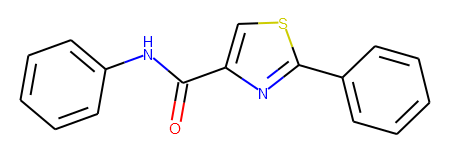

In [8]:
# Construct ligand from metadata
fragment_library = read_fragment_library(Path('../data/fragment_library_reduced/'))
mol = construct_ligand(
    recombined_ligand.fragment_ids, 
    recombined_ligand.bond_ids,
    fragment_library
)
# Show standardized molecule
standardize_mol(mol)

In [9]:
# Get exact ChEMBL match
chembl[chembl.inchi == recombined_ligand.inchi]

,chembl_id,inchi
840804,CHEMBL1458369,InChI=1S/C16H12N2OS/c19-15(17-13-9-5-2-6-10-13...


Compare in ChEMBL:

- ChEMBL - most similar: https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL1446166/
- ChEMBL - exact match: https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL1458369/

### Example 2

In [10]:
recombined_ligand = exact_matches.loc[5, :]
recombined_ligand

bond_ids                                     [[FP_6, AP_9], [SE_15, AP_8]]
fragment_ids                                          [AP_99, SE_9, FP_25]
hba                                                                      1
hbd                                                                      1
mwt                                                                      1
logp                                                                     1
n_atoms                                                                 29
chembl_exact                                                             1
chembl_most_similar                                   [CHEMBL254546, 0.87]
original_exact                                                           0
original_substructure                                                    0
inchi                    InChI=1S/C21H23N5O2S/c1-25-8-10-26(11-9-25)16-...
Name: 5, dtype: object

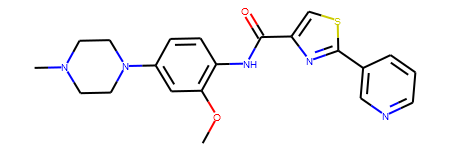

In [11]:
# Construct ligand from metadata
fragment_library = read_fragment_library(Path('../data/fragment_library_reduced/'))
mol = construct_ligand(
    recombined_ligand.fragment_ids, 
    recombined_ligand.bond_ids,
    fragment_library
)
# Show standardized molecule
standardize_mol(mol)

In [12]:
# Get exact ChEMBL match
chembl[chembl.inchi == recombined_ligand.inchi]

,chembl_id,inchi
229870,CHEMBL257127,InChI=1S/C21H23N5O2S/c1-25-8-10-26(11-9-25)16-...


Compare in ChEMBL:

- ChEMBL - most similar: https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL254546/
- ChEMBL - exact match: https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL257127/

### Example 3

In [13]:
recombined_ligand = exact_matches.loc[6, :]
recombined_ligand

bond_ids                                      [[FP_6, AP_9], [SE_3, AP_8]]
fragment_ids                                        [AP_99, FP_103, SE_74]
hba                                                                      1
hbd                                                                      1
mwt                                                                      1
logp                                                                     1
n_atoms                                                                 17
chembl_exact                                                             1
chembl_most_similar                                  [CHEMBL4070122, 0.79]
original_exact                                                           0
original_substructure                                                    0
inchi                    InChI=1S/C13H12N2OS/c1-2-8-14-12(16)11-9-17-13...
Name: 6, dtype: object

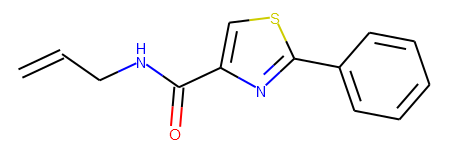

In [14]:
# Construct ligand from metadata
fragment_library = read_fragment_library(Path('../data/fragment_library_reduced/'))
mol = construct_ligand(
    recombined_ligand.fragment_ids, 
    recombined_ligand.bond_ids,
    fragment_library
)
# Show standardized molecule
standardize_mol(mol)

In [15]:
# Get exact ChEMBL match
chembl[chembl.inchi == recombined_ligand.inchi]

,chembl_id,inchi
700447,CHEMBL1349528,InChI=1S/C13H12N2OS/c1-2-8-14-12(16)11-9-17-13...


Compare in ChEMBL:

- ChEMBL - most similar: https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL4070122/
- ChEMBL - exact match: https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL1349528/

### Example 4 (of interest!!)

In [16]:
recombined_ligand = exact_matches.loc[8, :]
recombined_ligand

bond_ids                                    [[FP_10, AP_8], [SE_10, AP_9]]
fragment_ids                                         [AP_95, SE_22, FP_14]
hba                                                                      1
hbd                                                                      1
mwt                                                                      1
logp                                                                     1
n_atoms                                                                 28
chembl_exact                                                             1
chembl_most_similar                                  [CHEMBL2203552, 0.71]
original_exact                                                           1
original_substructure                                                    1
inchi                    InChI=1S/C21H17N5O2/c1-28-18-11-24-20(13-8-12-...
Name: 8, dtype: object

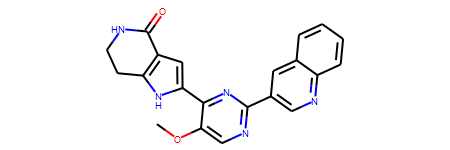

In [17]:
# Construct ligand from metadata
fragment_library = read_fragment_library(Path('../data/fragment_library_reduced/'))
mol = construct_ligand(
    recombined_ligand.fragment_ids, 
    recombined_ligand.bond_ids,
    fragment_library
)
# Show standardized molecule
standardize_mol(mol)

In [18]:
# Get exact ChEMBL match
chembl[chembl.inchi == recombined_ligand.inchi]

,chembl_id,inchi
1190263,CHEMBL2203552,InChI=1S/C21H17N5O2/c1-28-18-11-24-20(13-8-12-...


Compare in ChEMBL (same ChEMBL ID but similarity < 1!!!):

- ChEMBL - most similar: https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL2203552/
- ChEMBL - exact match: https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL2203552/

### Test fingerprint calculation

In [29]:
from rdkit.Chem import PandasTools, rdFingerprintGenerator
from rdkit import DataStructs

### klifs molecule

In [41]:
ligand = mol
start_inchi= Chem.MolToInchi(mol)
print(start_inchi)
start_smiles= Chem.MolToSmiles(mol)
print(start_smiles)
# generate query ligand fingerprint
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
query_fingerprint = rdkit_gen.GetFingerprint(ligand)

InChI=1S/C21H17N5O2/c1-28-18-11-24-20(13-8-12-4-2-3-5-15(12)23-10-13)26-19(18)17-9-14-16(25-17)6-7-22-21(14)27/h2-5,8-11,25H,6-7H2,1H3,(H,22,27)
COc1cnc(-c2cnc3ccccc3c2)nc1-c1cc2c([nH]1)CCNC2=O


### chembl molecule

In [46]:
# get ChEMBL fingerprint
chembl_fingerprints=[]
tmp_inchi = exact_matches.loc[8, :].inchi
print(tmp_inchi)
tmp_mol = Chem.MolFromInchi(tmp_inchi)
tmp_smiles= Chem.MolToSmiles(tmp_mol)
print(tmp_smiles)
# get fingerprint generator
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
chembl_fingerprints.append(rdkit_gen.GetFingerprint(tmp_mol))

InChI=1S/C21H17N5O2/c1-28-18-11-24-20(13-8-12-4-2-3-5-15(12)23-10-13)26-19(18)17-9-14-16(25-17)6-7-22-21(14)27/h2-5,8-11,25H,6-7H2,1H3,(H,22,27)
COc1cnc(-c2cnc3ccccc3c2)nc1-c1cc2c([nH]1)CCN=C2O


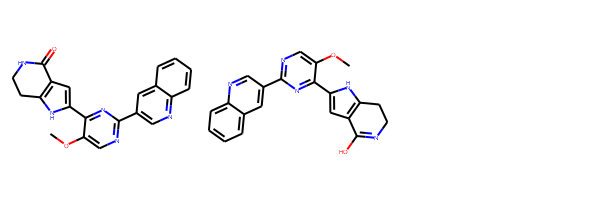

In [48]:
Chem.Draw.MolsToGridImage([ligand,tmp_mol])

In [ ]:
#COc1cnc(-c2cnc3ccccc3c2)nc1-c1cc2c([nH]1)CCNC2=O
#COc1cnc(-c2cnc3ccccc3c2)nc1-c1cc2c([nH]1)CCN=C2O

In [40]:
print(start_inchi==tmp_inchi)

True


In [43]:
print(start_smiles==tmp_smiles)

False


In [36]:
DataStructs.BulkTanimotoSimilarity(query_fingerprint, chembl_fingerprints)

[0.7076648841354723]

### Below functions only copied to use the same here

In [20]:
def _most_similar_chembl_ligand(ligand, chembl):
        """
        Get the most similar ChEMBL ligand (ChEMBL compound ID and Tanimoto similarity) to the query ligand.
        Parameters
        ----------
        ligand : rdkit.Chem.rdchem.Mol
        chembl : pandas.DataFrame
            ChEMBL ligands, column fingerprint necessary.
        Returns
        -------
        tuple of (str, float)
            ChEMBL compound ID and Tanimoto similarity of ChEMBL ligand most similar to the query ligand.
        """

        # generate query ligand fingerprint
        rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
        query_fingerprint = rdkit_gen.GetFingerprint(ligand)

        # get ChEMBL fingerprints as list
        chembl_fingerprints = chembl.fingerprint.to_list()

        # get pairwise similarities
        chembl['similarity'] = DataStructs.BulkTanimotoSimilarity(query_fingerprint, chembl_fingerprints)

        # get ligand with maximal similarity
        chembl_most_similar_ix = chembl.similarity.idxmax()

        return [
            chembl.loc[chembl_most_similar_ix].chembl_id,
            round(chembl.loc[chembl_most_similar_ix].similarity, 2)
        ]

In [24]:
def get_fingerprint_from_inchi(inchi):
    """
    Get fingerprint from InChI.
    Parameters
    ----------
    inchi : str
        InChI.
    Returns
    -------
    rdkit.DataStructs.cDataStructs.ExplicitBitVect
        Fingerprint.
    """

    # get molecule from InChI
    mol = Chem.MolFromInchi(inchi)

    # get fingerprint generator
    rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

    # get fingerprint
    if mol is not None:
        return rdkit_gen.GetFingerprint(mol)
    else:
        return None